In [1]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

In [2]:
conn = sql.connect('database.sqlite')

In [62]:
pd.read_sql_query('select * from Salaries',conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [6]:
def my_sql(q):
    return pd.read_sql_query(q,conn)

. Top 10 highest paid employees (by TotalPayBenefits)

In [19]:
q = '''select totalpaybenefits from Salaries desc limit 10'''

In [20]:
my_sql(q)

,TotalPayBenefits
0,567595.43
1,538909.28
2,335279.91
3,332343.61
4,326373.19
5,316285.74
6,315981.05
7,307899.46
8,303427.55
9,302377.73


2. Find which year has missing data of Employees with 'Not Provided'/ 'Not provided' .

In [24]:
q = '''select employeename,year from Salaries where employeename = "Not provided" or employeename = "Not Provided"'''
my_sql(q)

,EmployeeName,Year
0,Not Provided,2011
1,Not Provided,2012
2,Not provided,2014
3,Not provided,2014
4,Not provided,2014
5,Not provided,2014


3. Number of unique agencies

In [25]:
q = '''select distinct agency from salaries'''
my_sql(q)

,Agency
0,San Francisco


4. Show Average BasePay, OvertimePay, and TotalPay for year 2011

In [29]:
q = '''select avg(basepay),avg(overtimepay),avg(totalpay) from salaries where year is "2011"'''
my_sql(q)

,avg(basepay),avg(overtimepay),avg(totalpay)
0,63595.956517,4531.065429,71744.103871


5. Plot the top 10 job titles with the highest TotalPay in 2014.

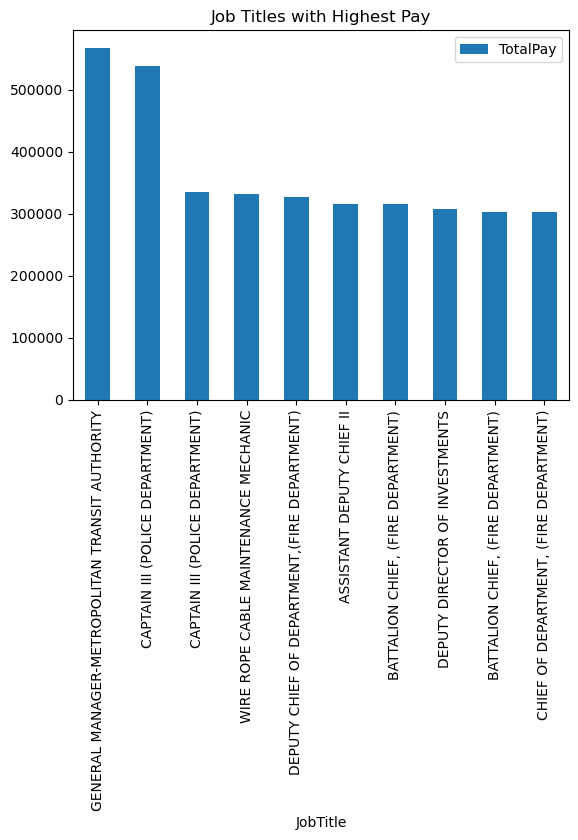

In [41]:
q = 'select totalpay,jobtitle from salaries desc limit 10'
top_jobs_2014 = my_sql(q)
top_jobs_2014.plot(kind='bar',x='JobTitle',y='TotalPay').set_title('Job Titles with Highest Pay')
plt.show()

6. Which job titles have overtime pay exceeding $150,000 exluding 'Not provided'

In [49]:
q = 'select jobtitle,overtimepay from salaries where overtimepay > 150000 and overtimepay != "Not provided" and overtimepay != "Not Provided"'
my_sql(q)

,JobTitle,OvertimePay
0,CAPTAIN III (POLICE DEPARTMENT),245131.88
1,"Lieutenant, Fire Suppression",220909.48
2,EMT/Paramedic/Firefighter,192424.49
3,Firefighter,160418.47
4,"Lieutenant, Fire Suppression",163477.81
5,Deputy Sheriff,196689.18
6,Deputy Sheriff,156077.49
7,Deputy Sheriff,173547.73
8,Deputy Sheriff,173178.23
9,Deputy Sheriff,169659.92


7. Find all employees whose job titles contain the word “CHIEF”

In [53]:
q = 'select employeename,jobtitle from salaries where jobtitle like "%CHIEF%"'
my_sql(q)

,EmployeeName,JobTitle
0,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
1,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II
2,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)"
3,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)"
4,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"
...,...,...
622,Sharon C Jackson,Chief Deputy Adlt Probation Of
623,Anita S Lee,Chief Clerk
624,George D Vaughan,Chief Nursery Specialist
625,Patrick W Gillespie,Chief Preparator


8. Count how many employees have job titles containing “ENGINEER” and “Fire” in year 2012 and 2013

In [66]:
q = '''select year,jobtitle from salaries where jobtitle like "%ENGINEER%" and jobtitle like "%Fire%" and year between 2012 and 2013'''
my_sql(q)

,Year,JobTitle
0,2012,Marine Engineer of Fire Boats
1,2012,Marine Engineer of Fire Boats
2,2012,Marine Engineer of Fire Boats
3,2012,Fire Protection Engineer
4,2012,Fire Protection Engineer
5,2012,Fire Protection Engineer
6,2012,Fire Protection Engineer
7,2012,Marine Engineer of Fire Boats
8,2013,Marine Engineer of Fire Boats
9,2013,Marine Engineer of Fire Boats


9. Distinct job titles starting with "CAPTAIN"

In [55]:
q = 'select distinct jobtitle from salaries where jobtitle like "CAPTAIN%"'
my_sql(q)

,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES"
2,"CAPTAIN, FIRE SUPPRESSION"
3,"CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC ..."
4,Captain 3
5,"Captain, Fire Suppression"
6,"Captain, Emergency Med Svcs"
7,"Captain, (Fire Department)"


10. Employees having basepay > 50k and totalpay < 150000 exlucding 'Not Provided'

In [60]:
q = '''select employeename,totalpay,basepay from salaries where basepay > 50000 and totalpay < 150000
and totalpay != "Not Provided" and basepay != "Not Provided"'''
my_sql(q)

,EmployeeName,TotalPay,BasePay
0,JAY DOWKE,149987.24,112380.37
1,MURRAY BOND,149975.80,149975.8
2,MARILOU GAN,149970.85,119703.78
3,BRIAN COLLINS,149964.61,105934.65
4,GREGORY NEAL,149952.47,106065.2
...,...,...,...
87255,Renee J Allen,53458.31,52428.53
87256,Melody M Butterworth,52555.44,52389.79
87257,Stephanie Reidy,51785.23,51668.7
87258,Paul E Maltzer,51673.98,51673.98
